# Assignment 06

remaned file from assignment_6_weather.ipynb to assignment06-weather.ipynb for consistency in file naming.

Importing the modules that will be used for importing and analysing the data.

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Sourcing the data from the [URL](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) given in the rask brief.

In [63]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Read CSV, skip metadata rows, handle mixed delimiters, and skip empty cells.
df = pd.read_csv(url, skiprows=23, engine='python', on_bad_lines='skip')
print(df.head(10))
print(df.info())
print(df.columns.tolist())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   
5  31-jul-1996 12:00    0  0.0      0  14.4      0  10.9    7.3    0.0     0   
6  31-jul-1996 13:00    0  0.0      0  14.9      0  10.9    6.7    0.0     0   
7  31-jul-1996 14:00    0  0.0      0  13.9      0  10.4    6.7    0.0     0   
8  31-jul-1996 15:00    0  0.0      0  13.2      0  10.9    8.6    0.0     0   
9  31-jul-1996 16:00    0  0.0      0  15.1      0  11.3    7.5    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   

## Part 1

Plots for:

- The temperature
- The mean temperature each day
- The mean temperature for each month

### Temperature Plot

The following will plot the hourly temperature data for each day from the dataset.

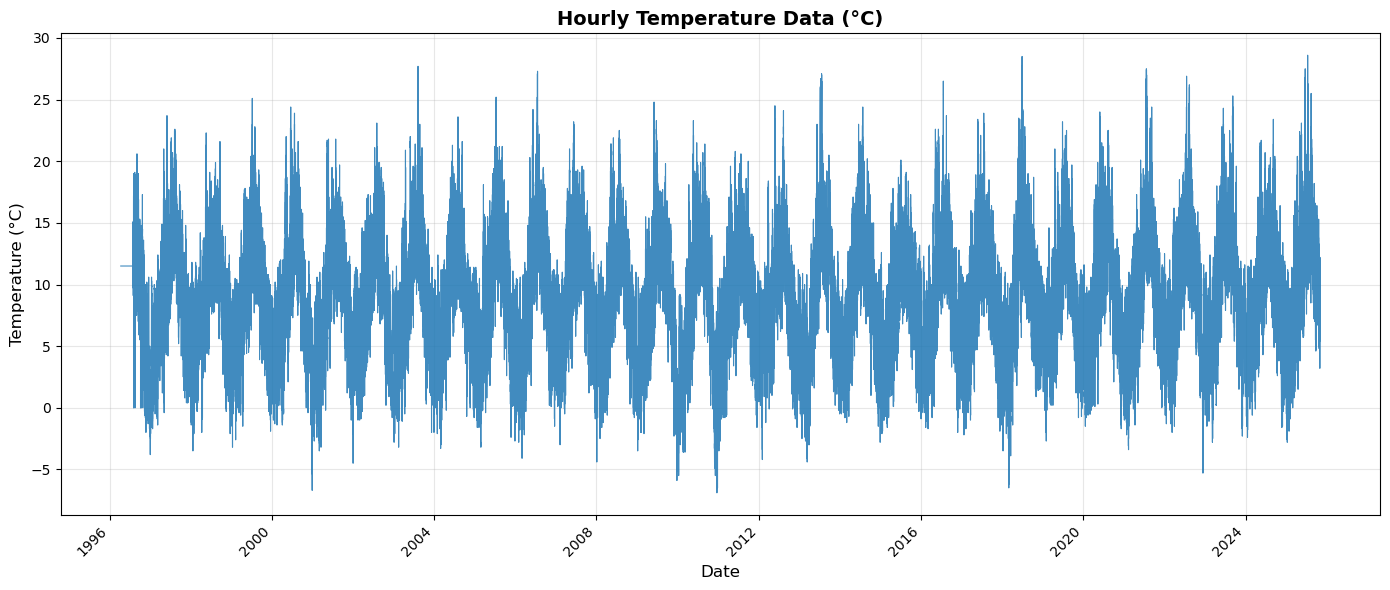

In [64]:
# Convert date and temperature columns to correct types
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

# Remove rows with NaT dates or NaN temps
df = df.dropna(subset=['date', 'temp'])

# Plot hourly temperature data
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['date'], df['temp'], linewidth=0.8, color='#1f77b4', alpha=0.85)
ax.set_title('Hourly Temperature Data (°C)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('daily_temperature_data.png', dpi=150, bbox_inches='tight')
plt.show()

The mean temperature for each day was also plotted.

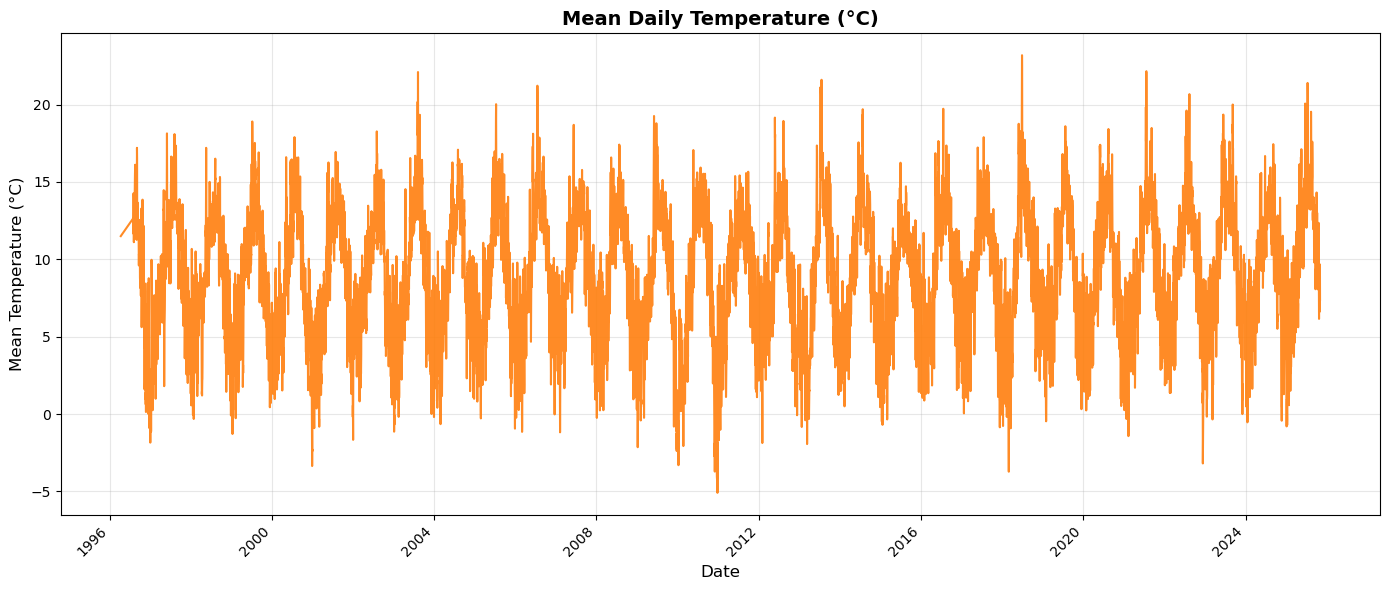

In [65]:
# Plot mean daily temperature
df['date_only'] = df['date'].dt.date
daily_mean = df.groupby('date_only')['temp'].mean().reset_index()
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_mean['date_only'], daily_mean['temp'], linewidth=1.5, color='#ff7f0e', alpha=0.9)
ax.set_title('Mean Daily Temperature (°C)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Temperature (°C)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mean_daily_temperature.png', dpi=150, bbox_inches='tight')
plt.show()

mean temp for each month

C:\Users\Admin\AppData\Local\Temp\ipykernel_6900\1137506231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temp', data=monthly_mean, palette='viridis', ax=ax)


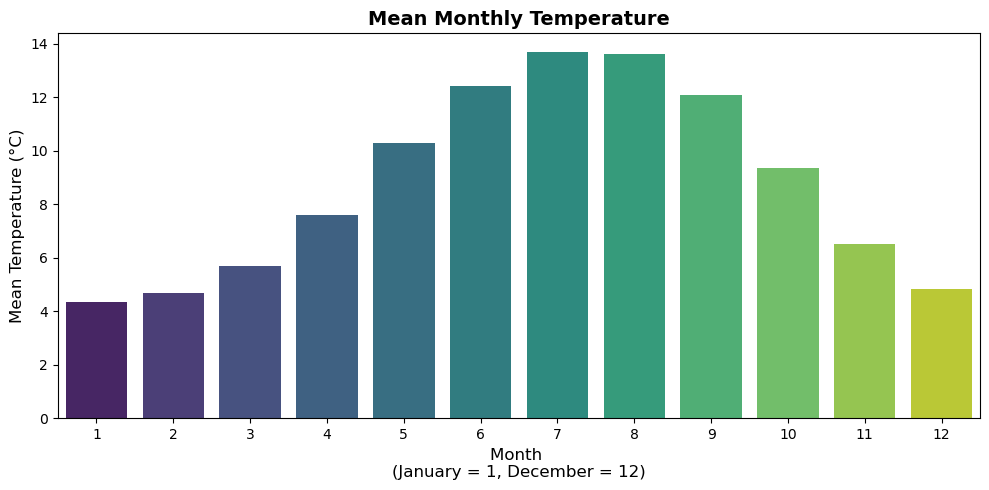

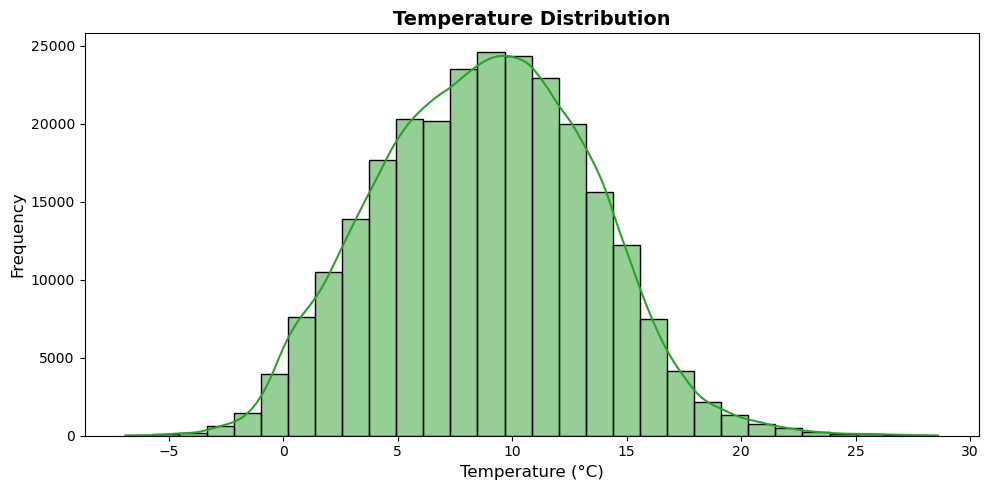

In [66]:
# Mean temperature for each month
df['month'] = df['date'].dt.month 
monthly_mean = df.groupby('month')['temp'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='month', y='temp', data=monthly_mean, palette='viridis', ax=ax)
ax.set_title('Mean Monthly Temperature', fontsize=14, fontweight='bold')
ax.set_xlabel('Month \n(January = 1, December = 12)', fontsize=12)
ax.set_ylabel('Mean Temperature (°C)', fontsize=12)
plt.tight_layout()
plt.savefig('mean_monthly_temperature.png', dpi=150, bbox_inches='tight')
plt.show()

# Now to see the normal distribution of temperature readings
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['temp'], bins=30, kde=True, color='#2ca02c', ax=ax)
ax.set_title('Temperature Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Temperature (°C)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('temperature_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


## Part 2

Plots for:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

plot for windspeed

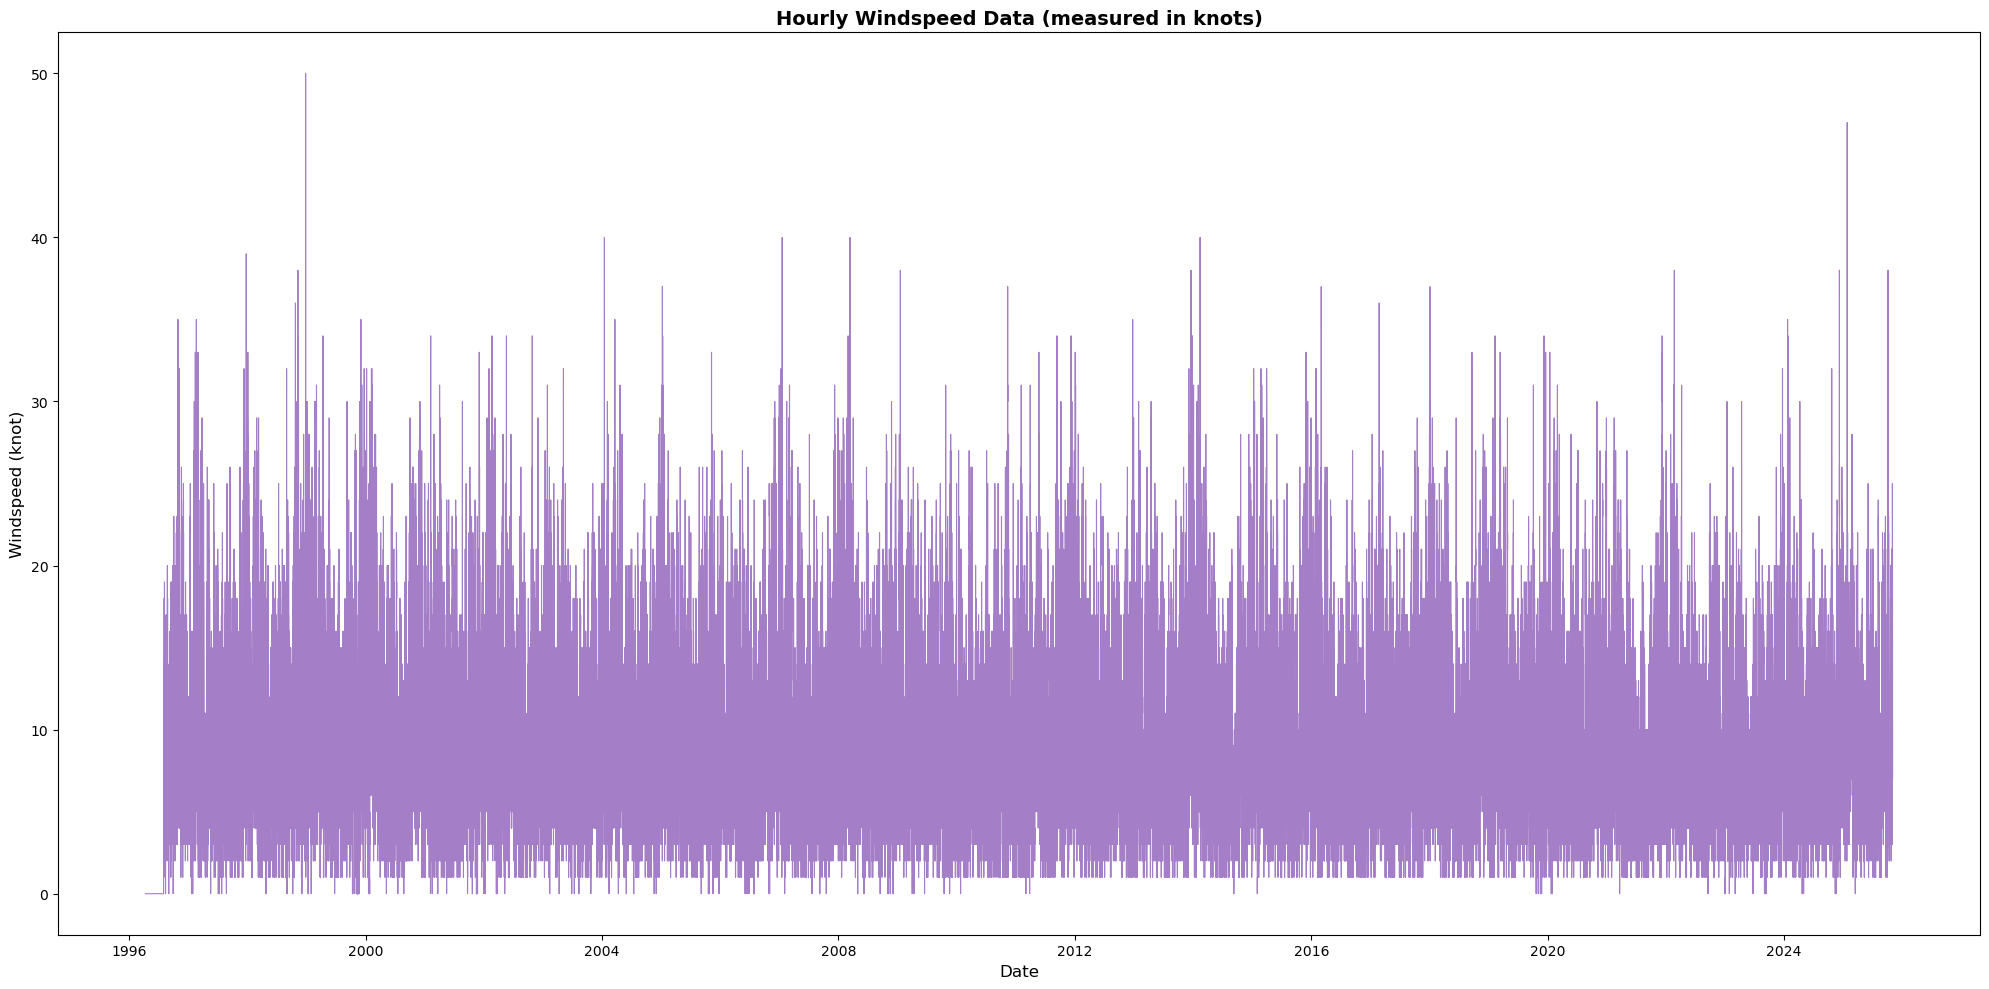

In [67]:
# Plot the windspeeds for the dataset and remove missing values
# remove rows with NaN windspeed
df = df.dropna(subset=['wdsp']) 

# Ensure 'wdsp' column is float for rolling calculation
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Plot hourly windspeed data
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['date'], df['wdsp'], linewidth=0.8, color='#9467bd', alpha=0.85)
ax.set_title('Hourly Windspeed Data (measured in knots)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Windspeed (knot)', fontsize=12)
plt.tight_layout()
plt.savefig('hourly_windspeed_data.png', dpi=150, bbox_inches='tight')
plt.show() 


Plot for Daily mean windspeeds over a 1 year period.

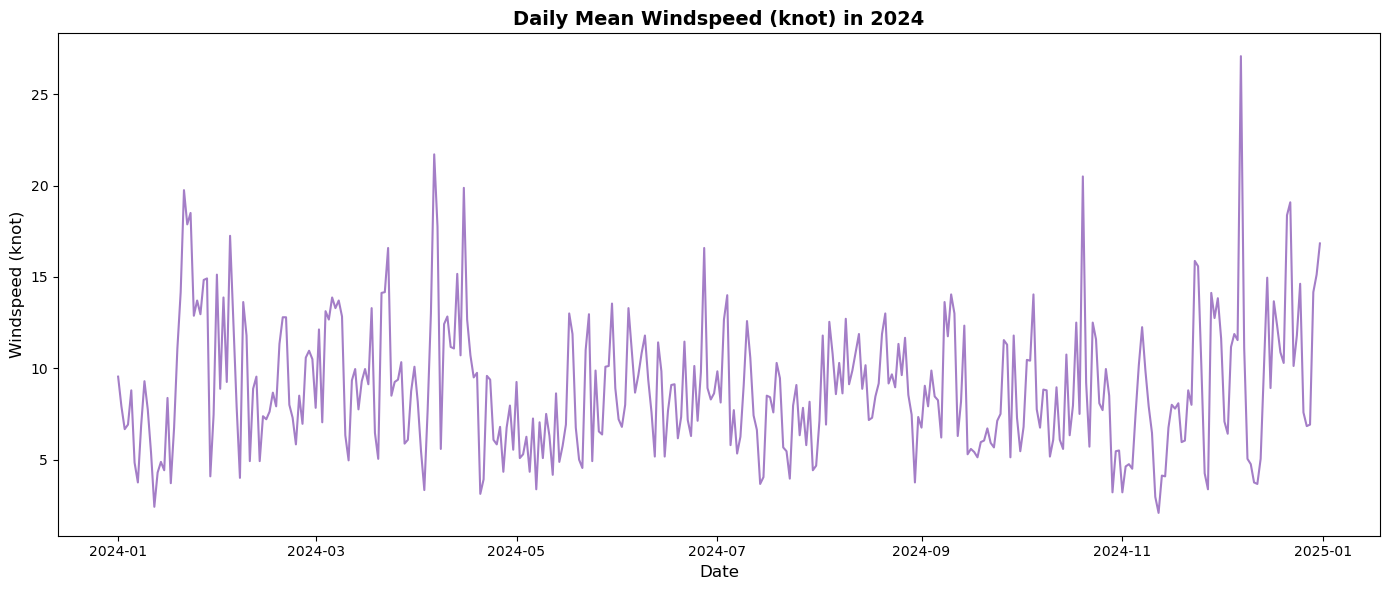

In [68]:
# Daily mean windspeed over a 1 year period - to see the data more clearly,
# Specify the year you want to plot
year = 2024

# Filter for the specific year
df_year = df[df['date'].dt.year == year]

# Calculate daily mean windspeed for the year
daily_average_wdsp = df_year.groupby('date_only')['wdsp'].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_average_wdsp['date_only'], daily_average_wdsp['wdsp'], linewidth=1.5, color='#9467bd', alpha=0.85)
ax.set_title(f'Daily Mean Windspeed (knot) in {year}', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Windspeed (knot)', fontsize=12)
plt.tight_layout()
plt.savefig(f'daily_windspeed_{year}.png', dpi=150, bbox_inches='tight')
plt.show()

Plot for windspeed - rolling plot for specific 24 hour period

I had some errors initially as the wdsp was a float and ideally it should be a numeric in order to plot so I converted it.

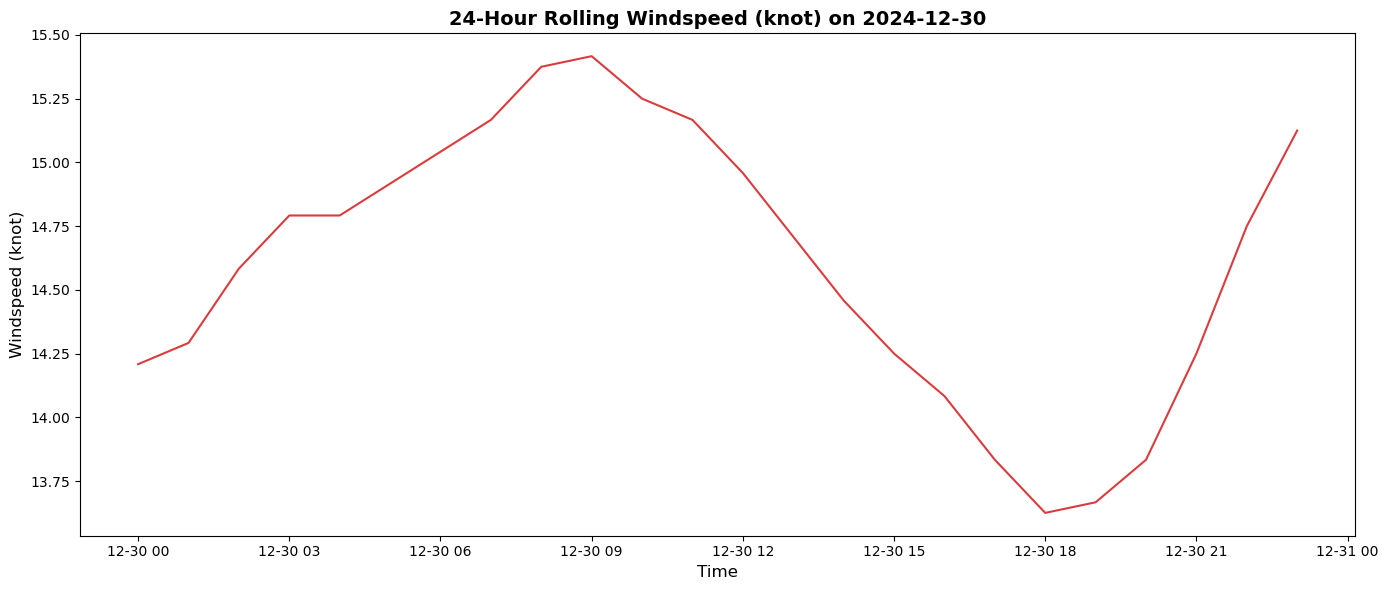

In [69]:
# Calculate 24-hour rolling mean for windspeed
df['wdsp_rolling'] = df['wdsp'].rolling(window=24).mean()

# Specify the date to filter
target_date = '2024-12-30'
df['date_only'] = df['date'].dt.date

# Filter for the specified date
filtered_df = df[df['date_only'] == pd.to_datetime(target_date).date()]

# Plot the rolling windspeed for the specified date
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(filtered_df['date'], filtered_df['wdsp_rolling'], linewidth=1.5, color='#d62728', alpha=0.9)
ax.set_title(f'24-Hour Rolling Windspeed (knot) on {target_date}', fontsize=14, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Windspeed (knot)', fontsize=12)
plt.tight_layout()
plt.savefig(f'rolling_windspeed_{target_date}.png', dpi=150, bbox_inches='tight')
plt.show()


Daily Maximum windspeed for all the data

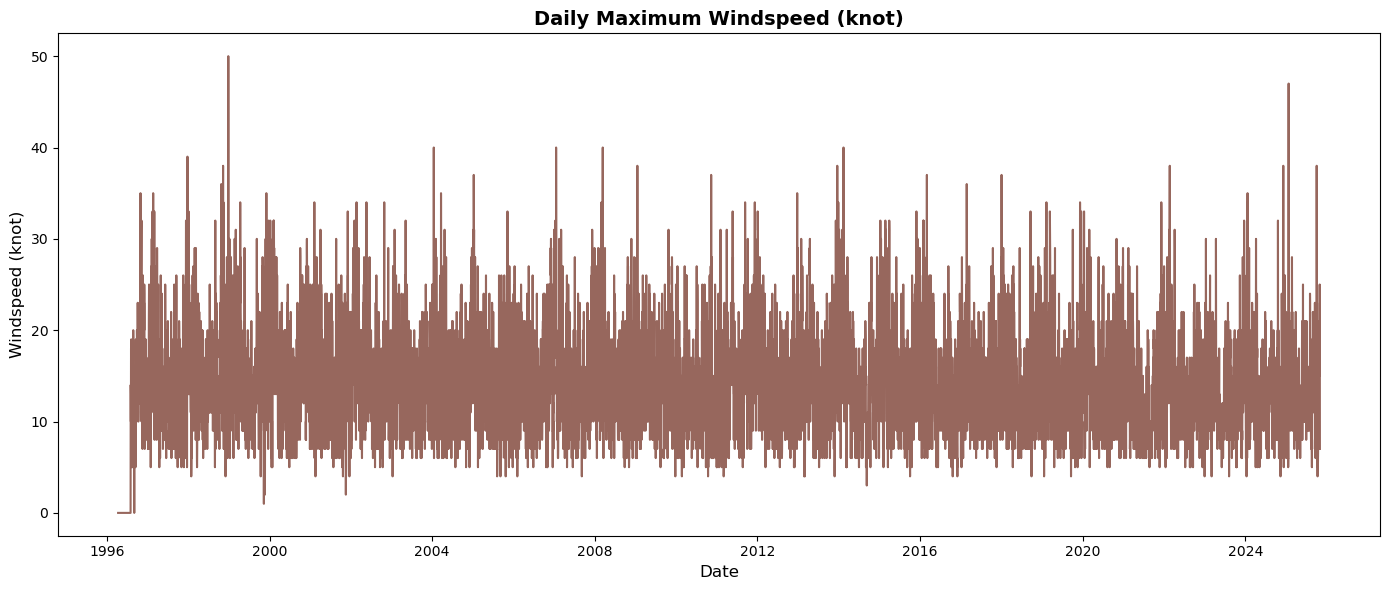

In [70]:
# Plotting the maximum windspeed for each day
daily_max = df.groupby('date_only')['wdsp'].max().reset_index()
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_max['date_only'], daily_max['wdsp'], linewidth=1.5, color='#8c564b', alpha=0.9)
ax.set_title('Daily Maximum Windspeed (knot)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Windspeed (knot)', fontsize=12)
plt.tight_layout()
plt.savefig('daily_max_windspeed.png', dpi=150, bbox_inches='tight')
plt.show()

Daily Maximum Windspeed over a 1 year period - here it is for 2024

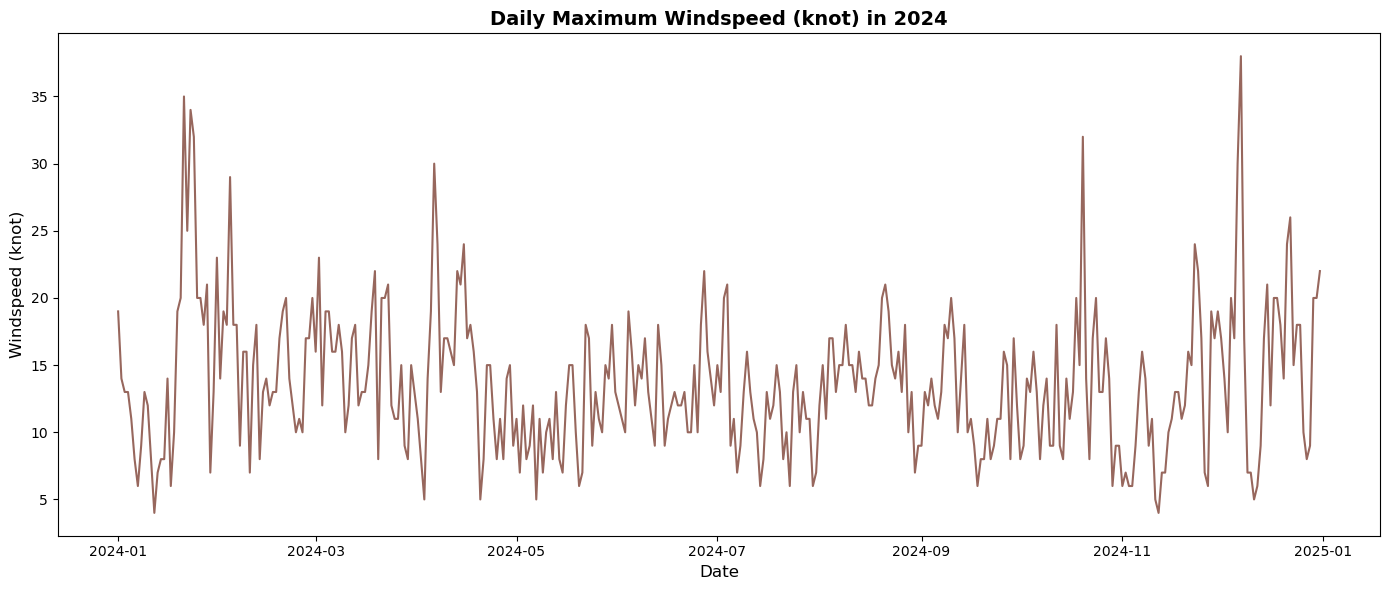

In [71]:
# Daily macimum windspeed over a 1 year period - to see the data more clearly,
# Specify the year you want to plot
year = 2024

# Filter for the specific year
df_year = df[df['date'].dt.year == year]

# Calculate daily maximum windspeed for the year
daily_max = df_year.groupby('date_only')['wdsp'].max().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_max['date_only'], daily_max['wdsp'], linewidth=1.5, color='#8c564b', alpha=0.9)
ax.set_title(f'Daily Maximum Windspeed (knot) in {year}', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Windspeed (knot)', fontsize=12)
plt.tight_layout()
plt.savefig(f'daily_max_windspeed_{year}.png', dpi=150, bbox_inches='tight')
plt.show()

Mean Monthly maximum windspeed

C:\Users\Admin\AppData\Local\Temp\ipykernel_6900\311864034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='wdsp', data=monthly_max_mean, palette='viridis', ax=ax)


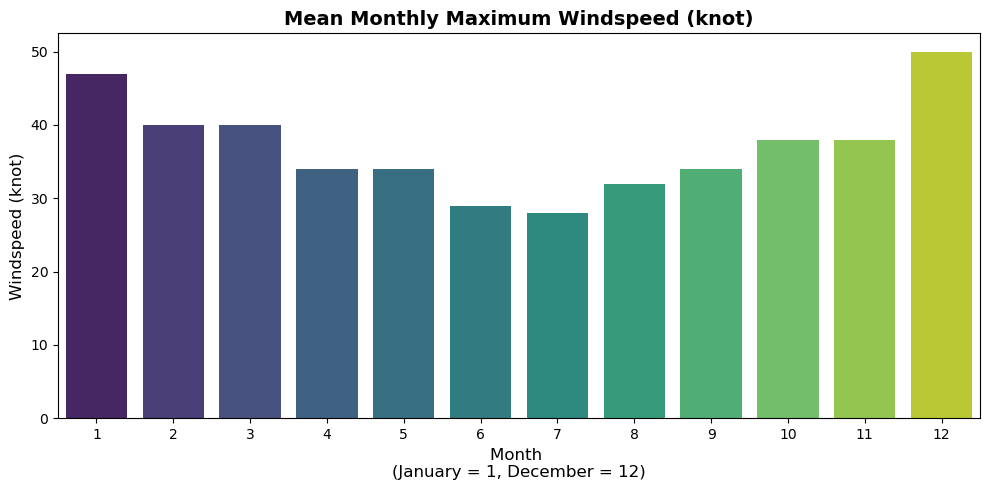

In [72]:
# I now need to plot the monthly meam of the daily maximum windspeed
df['month'] = df['date'].dt.month
monthly_max_mean = df.groupby('month')['wdsp'].max().reset_index()

# I now need to plot the monthly mean of the daily maximum windspeed
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='month', y='wdsp', data=monthly_max_mean, palette='viridis', ax=ax)
ax.set_title('Mean Monthly Maximum Windspeed (knot)', fontsize=14, fontweight='bold') 
ax.set_xlabel('Month \n(January = 1, December = 12)', fontsize=12)
ax.set_ylabel('Windspeed (knot)', fontsize=12)
plt.tight_layout()
plt.savefig('mean_monthly_max_windspeed.png', dpi=150, bbox_inches='tight')
plt.show()

# END